In [ ]:
import yfinance as yf
import numpy as np

In [ ]:
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
data.to_csv("AAPL_stock_data.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02 00:00:00+00:00,40.524334,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03 00:00:00+00:00,40.517284,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04 00:00:00+00:00,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05 00:00:00+00:00,41.168930,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08 00:00:00+00:00,41.016014,43.587502,43.902500,43.482498,43.587502,82271200


In [ ]:
data_close = data[('Close', 'AAPL')].dropna()
data_close = data_close[(np.abs(data_close - data_close.mean()) <= (3 * data_close.std()))]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

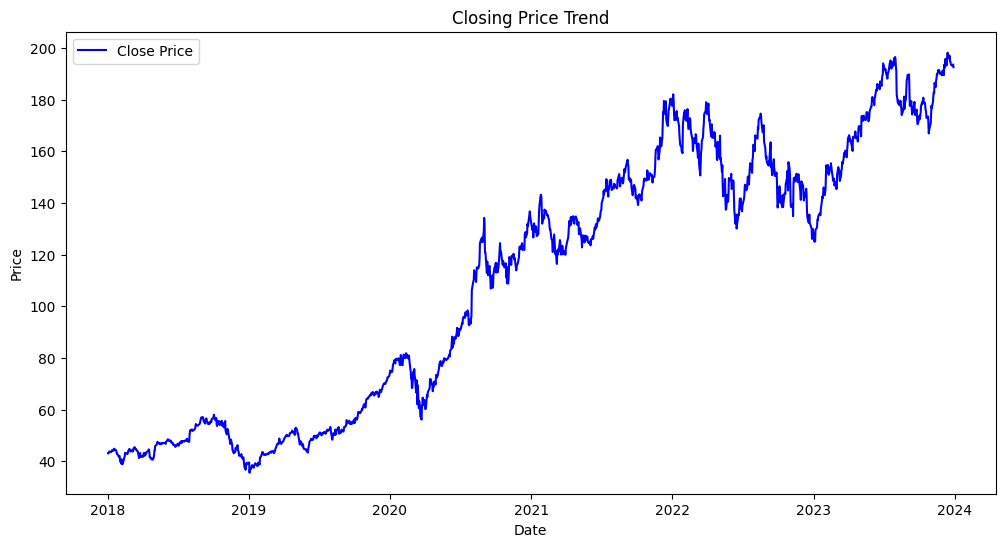

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_close, label='Close Price', color='blue')
plt.title('Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

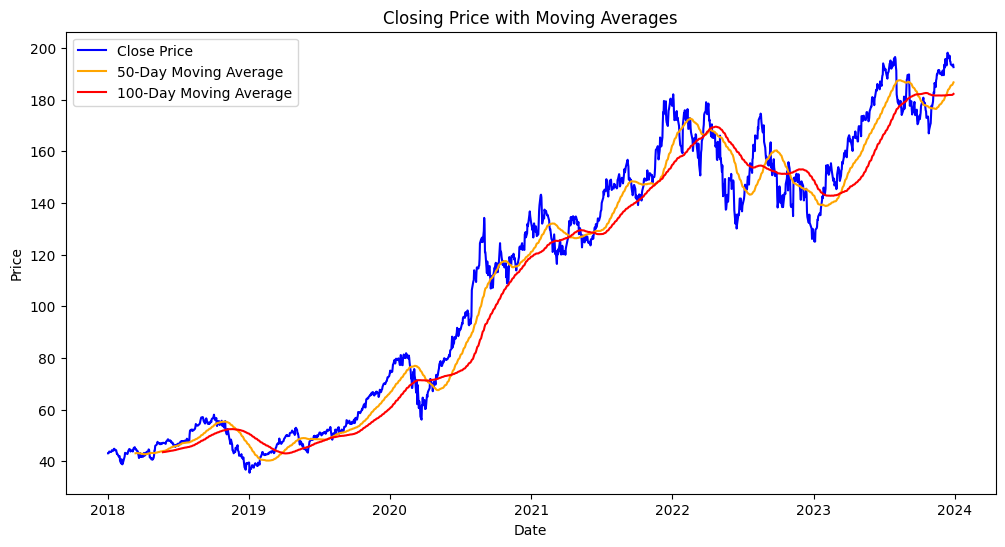

In [ ]:
data_close_ma50 = data_close.rolling(window=50).mean()
data_close_ma100 = data_close.rolling(window=100).mean()

# Visualize the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data_close, label='Close Price', color='blue')
plt.plot(data_close_ma50, label='50-Day Moving Average', color='orange')
plt.plot(data_close_ma100, label='100-Day Moving Average', color='red')
plt.title('Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

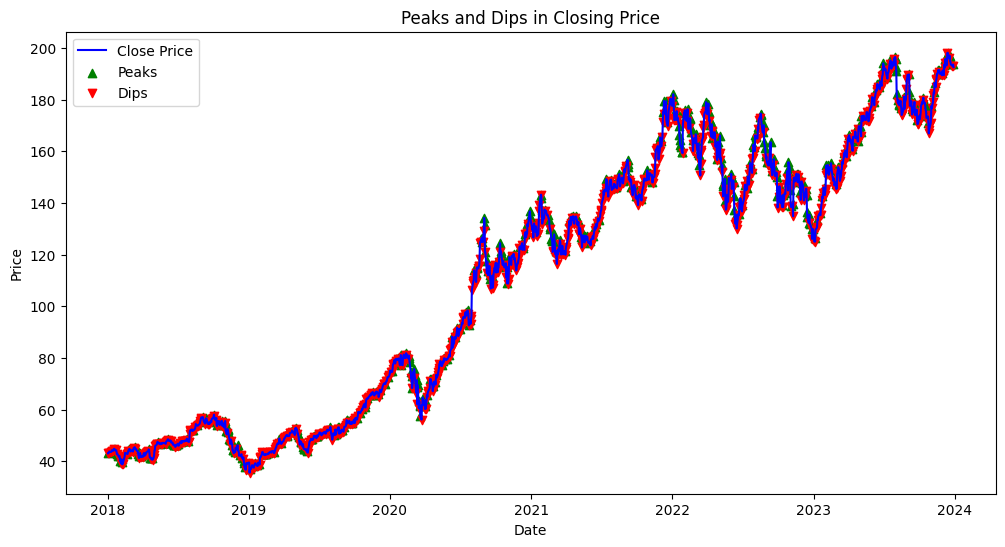

In [ ]:
peaks = data_close[data_close.diff().shift(-1) < 0]  # Peaks
dips = data_close[data_close.diff().shift(-1) > 0]   # Dips

plt.figure(figsize=(12, 6))
plt.plot(data_close, label='Close Price', color='blue')
plt.scatter(peaks.index, peaks, color='green', label='Peaks', marker='^')
plt.scatter(dips.index, dips, color='red', label='Dips', marker='v')
plt.title('Peaks and Dips in Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

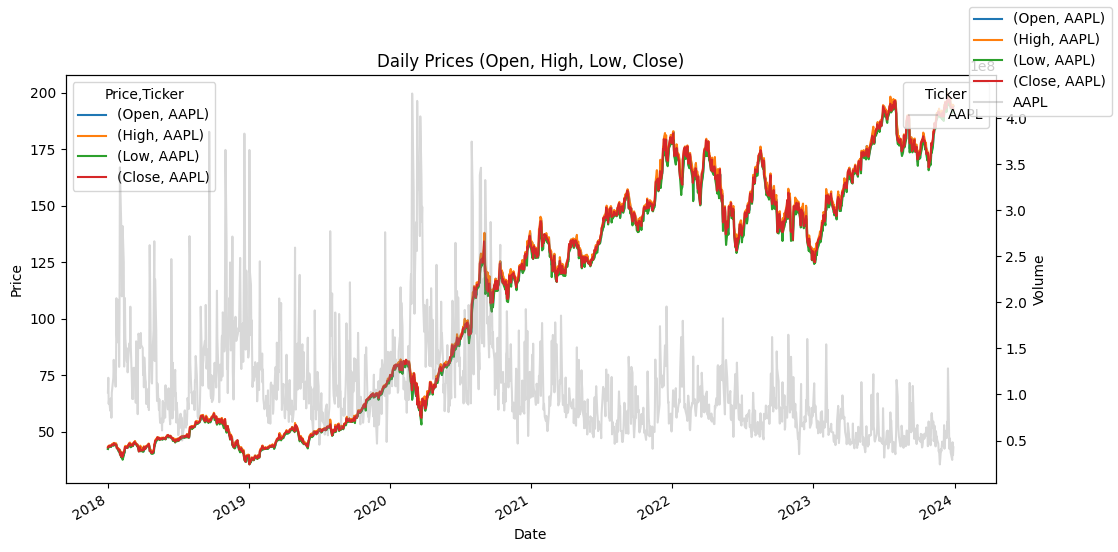

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
data[['Open', 'High', 'Low', 'Close']].plot(ax=ax1)
ax1.set_title('Daily Prices (Open, High, Low, Close)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Overlay volume plot
ax2 = ax1.twinx()
data['Volume'].plot(ax=ax2, alpha=0.3, color='gray', label='Volume')
ax2.set_ylabel('Volume')
fig.legend(loc='upper right')
plt.show()

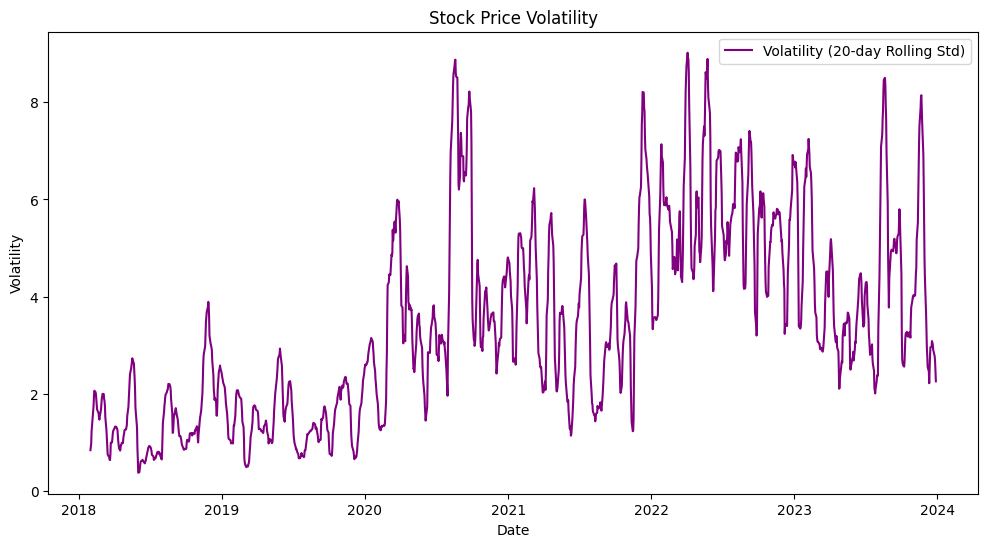

In [ ]:
volatility = data_close.rolling(window=20).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(volatility, label='Volatility (20-day Rolling Std)', color='purple')
plt.title('Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
!pip install pmdarima


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5262.799, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5265.931, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5262.915, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5262.735, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5265.710, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5264.182, Time=2.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5264.393, Time=1.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5266.182, Time=2.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5262.774, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 11.076 seconds
Best ARIMA Model: (0, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1207
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2628.368
Date:               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


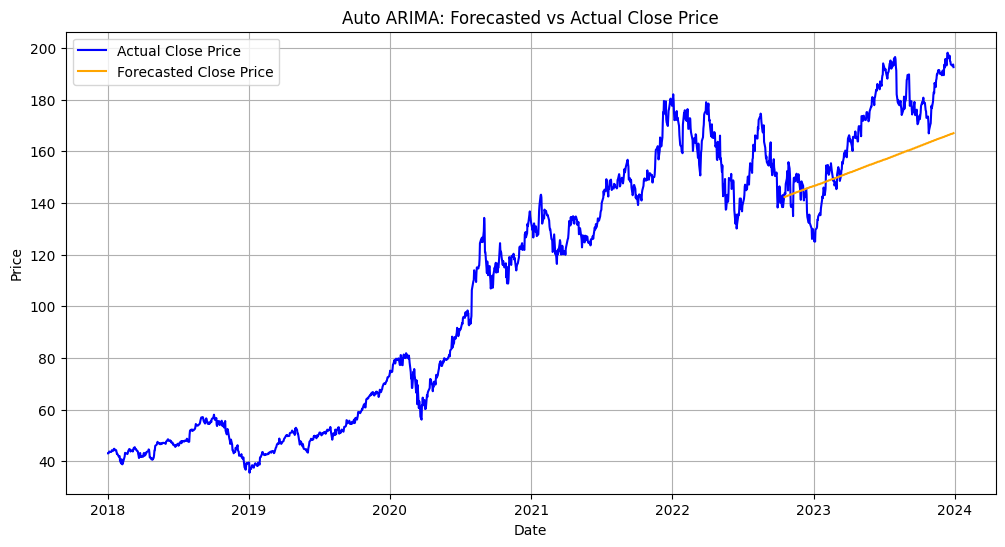

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


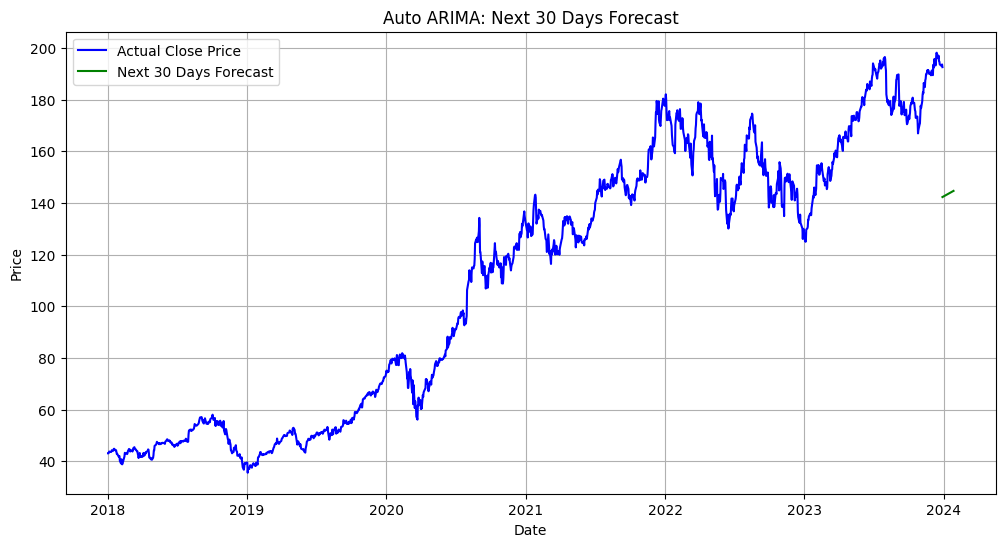

In [ ]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

train_size = int(len(data_close) * 0.8)
train, test = data_close[:train_size], data_close[train_size:]

auto_model = auto_arima(train,
                        seasonal=False,
                        stepwise=True,
                        trace=True,
                        error_action="ignore",
                        suppress_warnings=True)

print("Best ARIMA Model:", auto_model.order)
print(auto_model.summary())

forecast = auto_model.predict(n_periods=len(test))
forecast_dates = test.index

plt.figure(figsize=(12, 6))
plt.plot(data_close, label='Actual Close Price', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Close Price', color='orange')
plt.title('Auto ARIMA: Forecasted vs Actual Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

future_forecast = auto_model.predict(n_periods=30)
future_dates = pd.date_range(start=test.index[-1], periods=30, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(data_close, label='Actual Close Price', color='blue')
plt.plot(future_dates, future_forecast, label='Next 30 Days Forecast', color='green')
plt.title('Auto ARIMA: Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 15.86
Mean Squared Error (MSE): 356.12
Root Mean Squared Error (RMSE): 18.87
